This dataset focuses on the compressive strength of concrete which is one of the most important materials in the area of civil engineering. Concrete in engineering industries is classified based on grades and is tested under some kind of compression testing machine. Compressive strength is the capacity of some material to withstand various loads that aim to reduce size. Based on these grades, civil engineers can make proper decisions without wasting many resources.
Compressive strength is a nonlinear function of varying feature ingredients as input variables and an output variable of strength.

# Regression: Concrete Strength

In [62]:
# importing standard libraries with standard names
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import requests
from sklearn import svm
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import Perceptron, LogisticRegression
from statsmodels.tools.eval_measures import mse
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_squared_error as mse

In [2]:
# Using pandas to read download data .csv file and assigning to variable "dataset"
df = pd.read_csv('concrete_data.csv')

# Understanding the Big Picture

info() will show us a list of columns with their names and the variable types in each column. After these results are printed, we are able to decide upon nomenclature and if everything makes sense.

In [3]:
# Information about Columns with Variable Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


We see that most of the names of the columns make sense and have clear titles. However, some column names could be more specific.
  
We also see that the variable types for each column correspond with what the data is trying to show. 

Next we want to analyze the elements within the dataset.

In [4]:
# Number of Rows/Columns
df.shape

(1030, 9)

In [5]:
# How many elements are there?
df.size

9270

It is unrealistic to look at all 1030 rows of data and 9 columns of this data. To combat this we look at .head() which shows the first five rows and .tail() which shows the last five rows. Because of this we are able to analyze if the data makes sense. 

In [6]:
# Examine first five rows.
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
# Examine last five rows.
df.tail()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [8]:
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


We see for both sets of the first five and the last five, there are no extreme values.

To examine the necessary statistics of the data we can use describe() to get a concrete list.

In [9]:
# Statistics of Data
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


We must analyze the null values as if these exist within the dataset then it will skew the results of the data analysis very heavily.

In [10]:
# How many null values are there?
df.isna().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

Since there are no missing values, there is no need to drop any of these type values.

# Preparation

In [11]:
# Check number of duplicated rows:
duplicates = df.duplicated().sum()
print(f'Duplicate Rows: {duplicates}')

Duplicate Rows: 25


In [12]:
# Remove duplicate rows:
print(df.drop_duplicates())

      cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
2      332.5               142.5      0.0  228.0               0.0   
3      332.5               142.5      0.0  228.0               0.0   
4      198.6               132.4      0.0  192.0               0.0   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  
0               1040.0            676.0   28                          79.99  
1  

**Categorical Variables**  
- We will examine ".value_counts()" and ".nunique" to understand the amount of values of a variable exist in the dataset.

In [13]:
# Count the amount of each variable:
df.value_counts() 

# The first element is the most frequently occuring.

cement  blast_furnace_slag  fly_ash  water  superplasticizer  coarse_aggregate  fine_aggregate   age  concrete_compressive_strength
362.6   189.0               0.0      164.9  11.6              944.7             755.8            3    35.30                            4
                                                                                                 28   71.30                            4
                                                                                                 56   77.30                            4
                                                                                                 91   79.30                            4
425.0   106.3               0.0      153.5  16.5              852.1             887.1            56   64.30                            3
                                                                                                                                      ..
213.8   98.1                24.5     181.7  6.

In [14]:
# Frequency of uniqueness of given variable:
df.value_counts(normalize=True)

cement  blast_furnace_slag  fly_ash  water  superplasticizer  coarse_aggregate  fine_aggregate   age  concrete_compressive_strength
362.6   189.0               0.0      164.9  11.6              944.7             755.8            3    35.30                            0.003883
                                                                                                 28   71.30                            0.003883
                                                                                                 56   77.30                            0.003883
                                                                                                 91   79.30                            0.003883
425.0   106.3               0.0      153.5  16.5              852.1             887.1            56   64.30                            0.002913
                                                                                                                                         ...   
213.

In [15]:
# Summary of unique values in each column:
df.nunique()

cement                           278
blast_furnace_slag               185
fly_ash                          156
water                            195
superplasticizer                 111
coarse_aggregate                 284
fine_aggregate                   302
age                               14
concrete_compressive_strength    845
dtype: int64

**Numeric Variables**  
- We can analyze the quantitative aspect of the dataset and its distribution by using "describe()" and we will display the distribution using a histogram ".hist()".

In [16]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


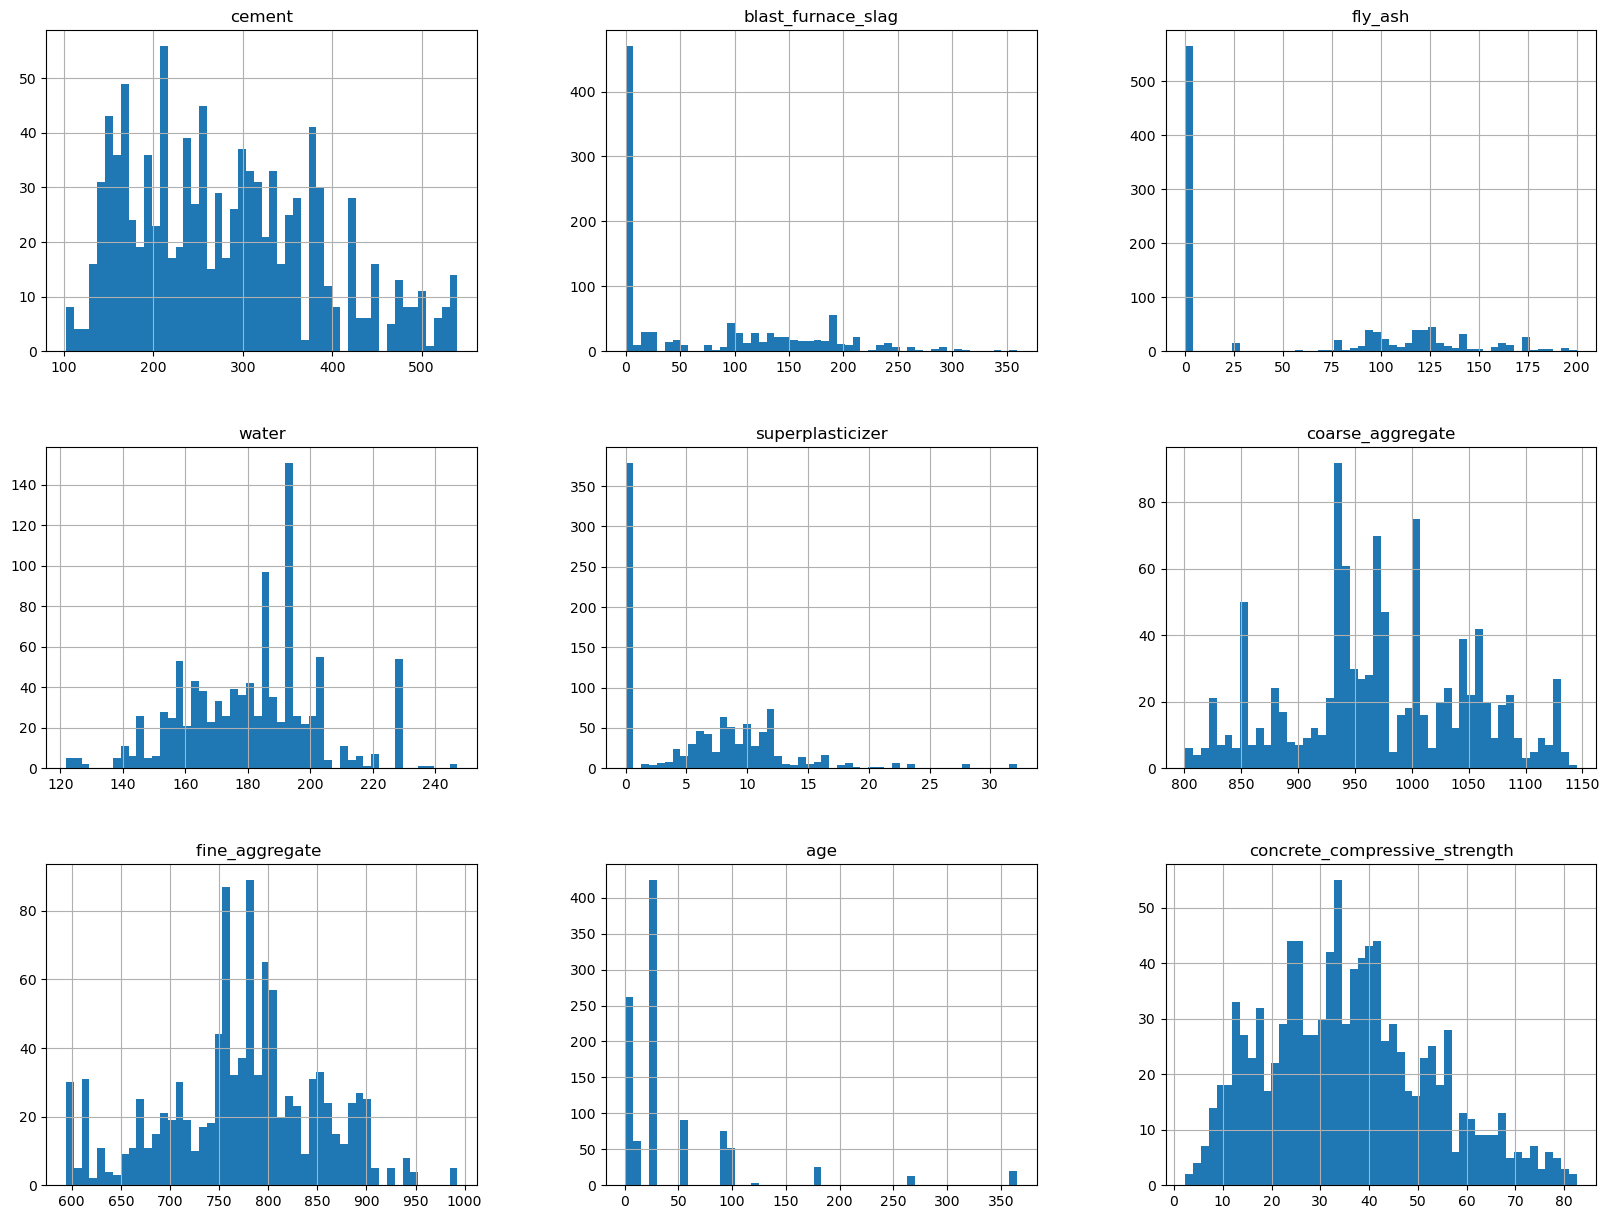

In [17]:
# Creating histograms for each variable:
df.hist(bins=50, figsize=(20,15))
plt.show()

When we examine each histogram, we can see that there exist a vew **outliers** in variables such as:  
- Blast Furnace Slag  
- Fly Ash  
- Suplerplasticizer  
- Age  
  
We must confirm and aim to **eliminate these outliers and clean up the dataset** so the result of our data analysis will not become skewed.

# Organizing/Cleaning Data

First, we want to check if there exist outliers in the dataset. To do this we will look at a boxplot for each variable. To do this we must tell Python what our target set is and which variables are the features. Since we are aiming to analyze the strength of the concrete this is our target.

In [18]:
import seaborn as sns

In [19]:
features = [col for col in df.columns if col != 'Strength']
target = ['Strength']

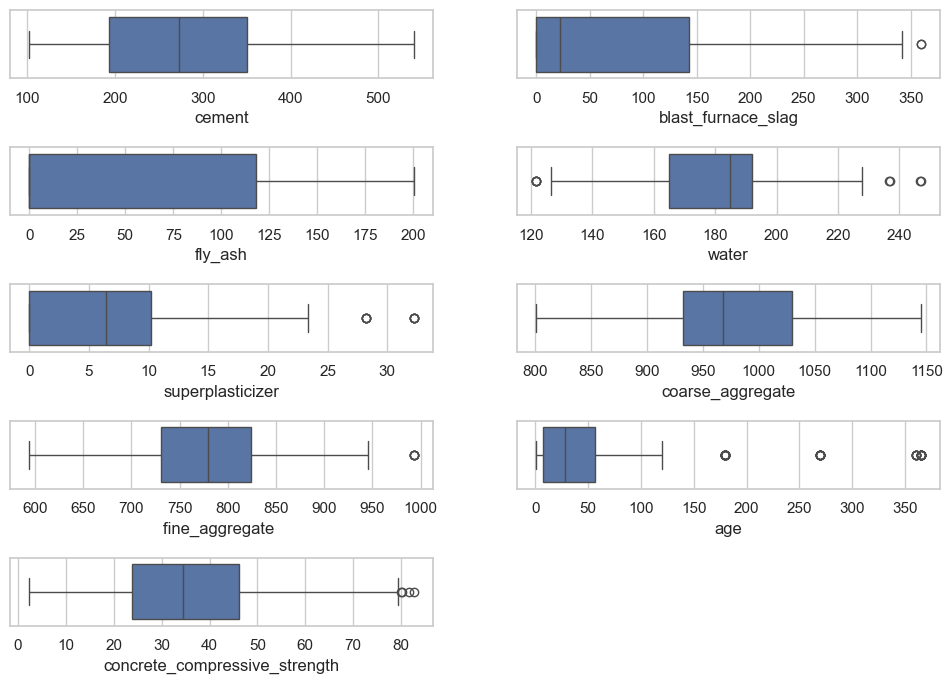

In [20]:
plt.figure(figsize = (12,8))
n = 0
sns.set(style="whitegrid")
for i in features: #for loop to make boxplots for each variable without having to retype code
    n += 1
    plt.subplot(5,2,n)
    plt.subplots_adjust(hspace = 1, wspace = 0.2)
    sns.boxplot(x = df[i])
plt.show()

As predicted four of our variables have outliers. However, this is why looking at histograms is not enough. We were not able to see that water also has outliers. This is why it is necessary to use boxplots that employ the method of interquartile range.

We create "def" which represents a function to be able to **remove the outliers**. We will focus on the Interquartile Range to accomplish this. If some data points fall outside of Q3 + (IQR * 3) or Q1 = (IQR * 3) they will be considered outliers and should be removed from the data which will follow in later steps. 

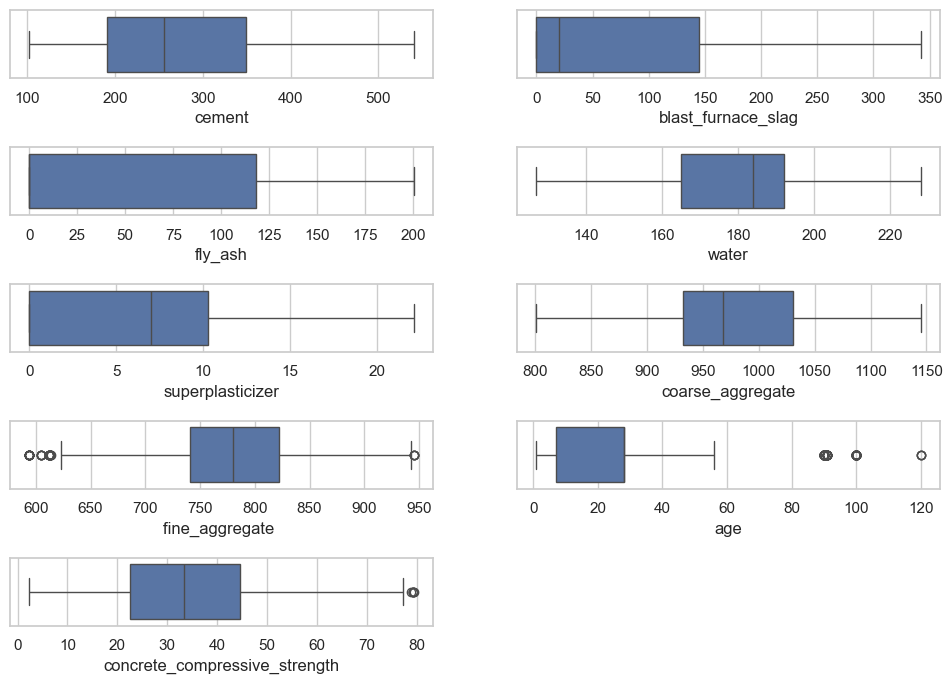

In [21]:
# Function to remove outliers
def outlier_removal(df):
    # Defining all areas of IQR analysis:
    Q1 = np.percentile(df, 25, axis=0)  # percentile per column (axis=0)
    Q3 = np.percentile(df, 75, axis=0)
    IQR = Q3 - Q1
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)

    # Remove outliers by filtering rows
    set_no_outliers = df[~((df < lower) | (df > upper)).any(axis=1)]
    return set_no_outliers

# Call the function to remove outliers from the entire DataFrame
set_no_outliers = outlier_removal(df)

# Visualize the data without outliers
plt.figure(figsize=(12, 8))
n = 0
sns.set(style="whitegrid")

for i in features:  # For loop to make boxplots for each variable
    n += 1
    plt.subplot(5, 2, n)
    plt.subplots_adjust(hspace=1, wspace=0.2)
    sns.boxplot(x=set_no_outliers[i])  # Use df_no_outliers here

plt.show()


To apply this function to our data we must create a data frame to work with. It is a 2-D structure thought of as a table that we can insert our "cleaned" data into.

We can again compare the statistics of each set with outliers and without outliers by using describe().

In [22]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [23]:
set_no_outliers.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


We are able to see how each of the statistical measures changes with and without outliers. The second describe() is more accurate as outliers will screw the result of data analysis heavily. 

In [24]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [25]:
set_no_outliers.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000
mean,275.765250,73.860680,58.019979,180.618066,6.247396,974.808289,776.551860,32.376196,34.887641
std,101.888133,86.357928,64.363959,18.748963,5.340911,77.646578,75.075034,28.558690,16.592538
min,102.000000,0.000000,0.000000,127.000000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.300000,0.000000,0.000000,164.900000,0.000000,932.000000,741.000000,7.000000,22.630000
50%,255.500000,20.000000,0.000000,183.800000,7.000000,968.000000,780.000000,28.000000,33.400000
75%,349.000000,145.000000,118.300000,192.000000,10.300000,1031.000000,822.200000,28.000000,44.640000
max,540.000000,342.100000,200.100000,228.000000,22.100000,1145.000000,945.000000,120.000000,79.400000


In [26]:
import seaborn as sns

# Before Cleaning

The **Correlation Matrix** helps us find some initial relationships between the variables. It will also have a strong connection to the latter "Correlation Heatmap" The main components of the matrix include:  
- The range is from [-1,1].  
- The larger the magnitude of the connection, the stronger the correlation is.  
- If the value is positive there is a normal linear correlation where if one value increases so does the other and vice versa.  
- If the value is negative there is an inverse linear correlation where the opposite is true. 

In [27]:
# Correlation Matrix for Data with Outliers
df.corr()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
blast_furnace_slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
fly_ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarse_aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fine_aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
concrete_compressive_strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


Now using seaborn library we will convert the matrix into a heatmap. The heatmap shows at which areas there is the strongest correlation between variables by displaying it as a the darkest color for inveres correlations and as the lightest color of positive correlations.

Text(0.5, 1.0, 'Correlation Heatmap')

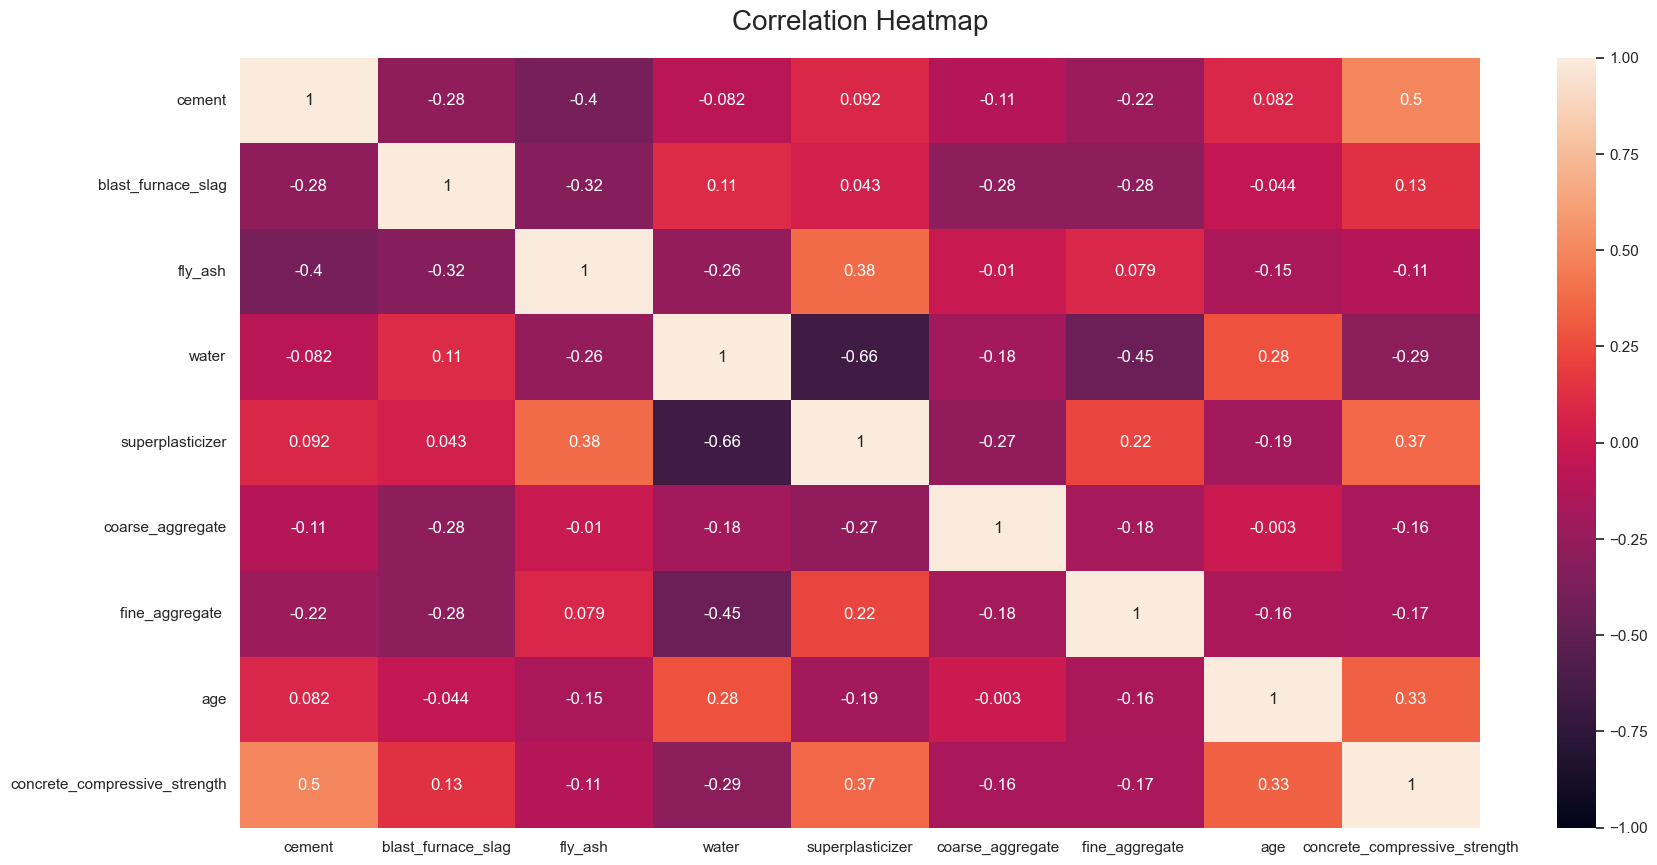

In [28]:
# Correlation Heatmap 
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True)
heatmap.set_title("Correlation Heatmap",fontdict={'fontsize':20}, pad=20)

We can see for example the strongest correlation is inverse and linear at -0.66 between columns "water" and "superplasticizer". This makes sense as the more water required for the cement, the less superplasticizer required and vice versa. We also see strong correlations in the opposite direction for positive correlations like 0.5 between strength and cement.

Next, we will examine a **pairplot** which shows the scatterplot of two variables. This makes scatterplots of all possible combinations to see the relation between variables.

In [29]:
plt.figure(figsize=(30,30))

<Figure size 3000x3000 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

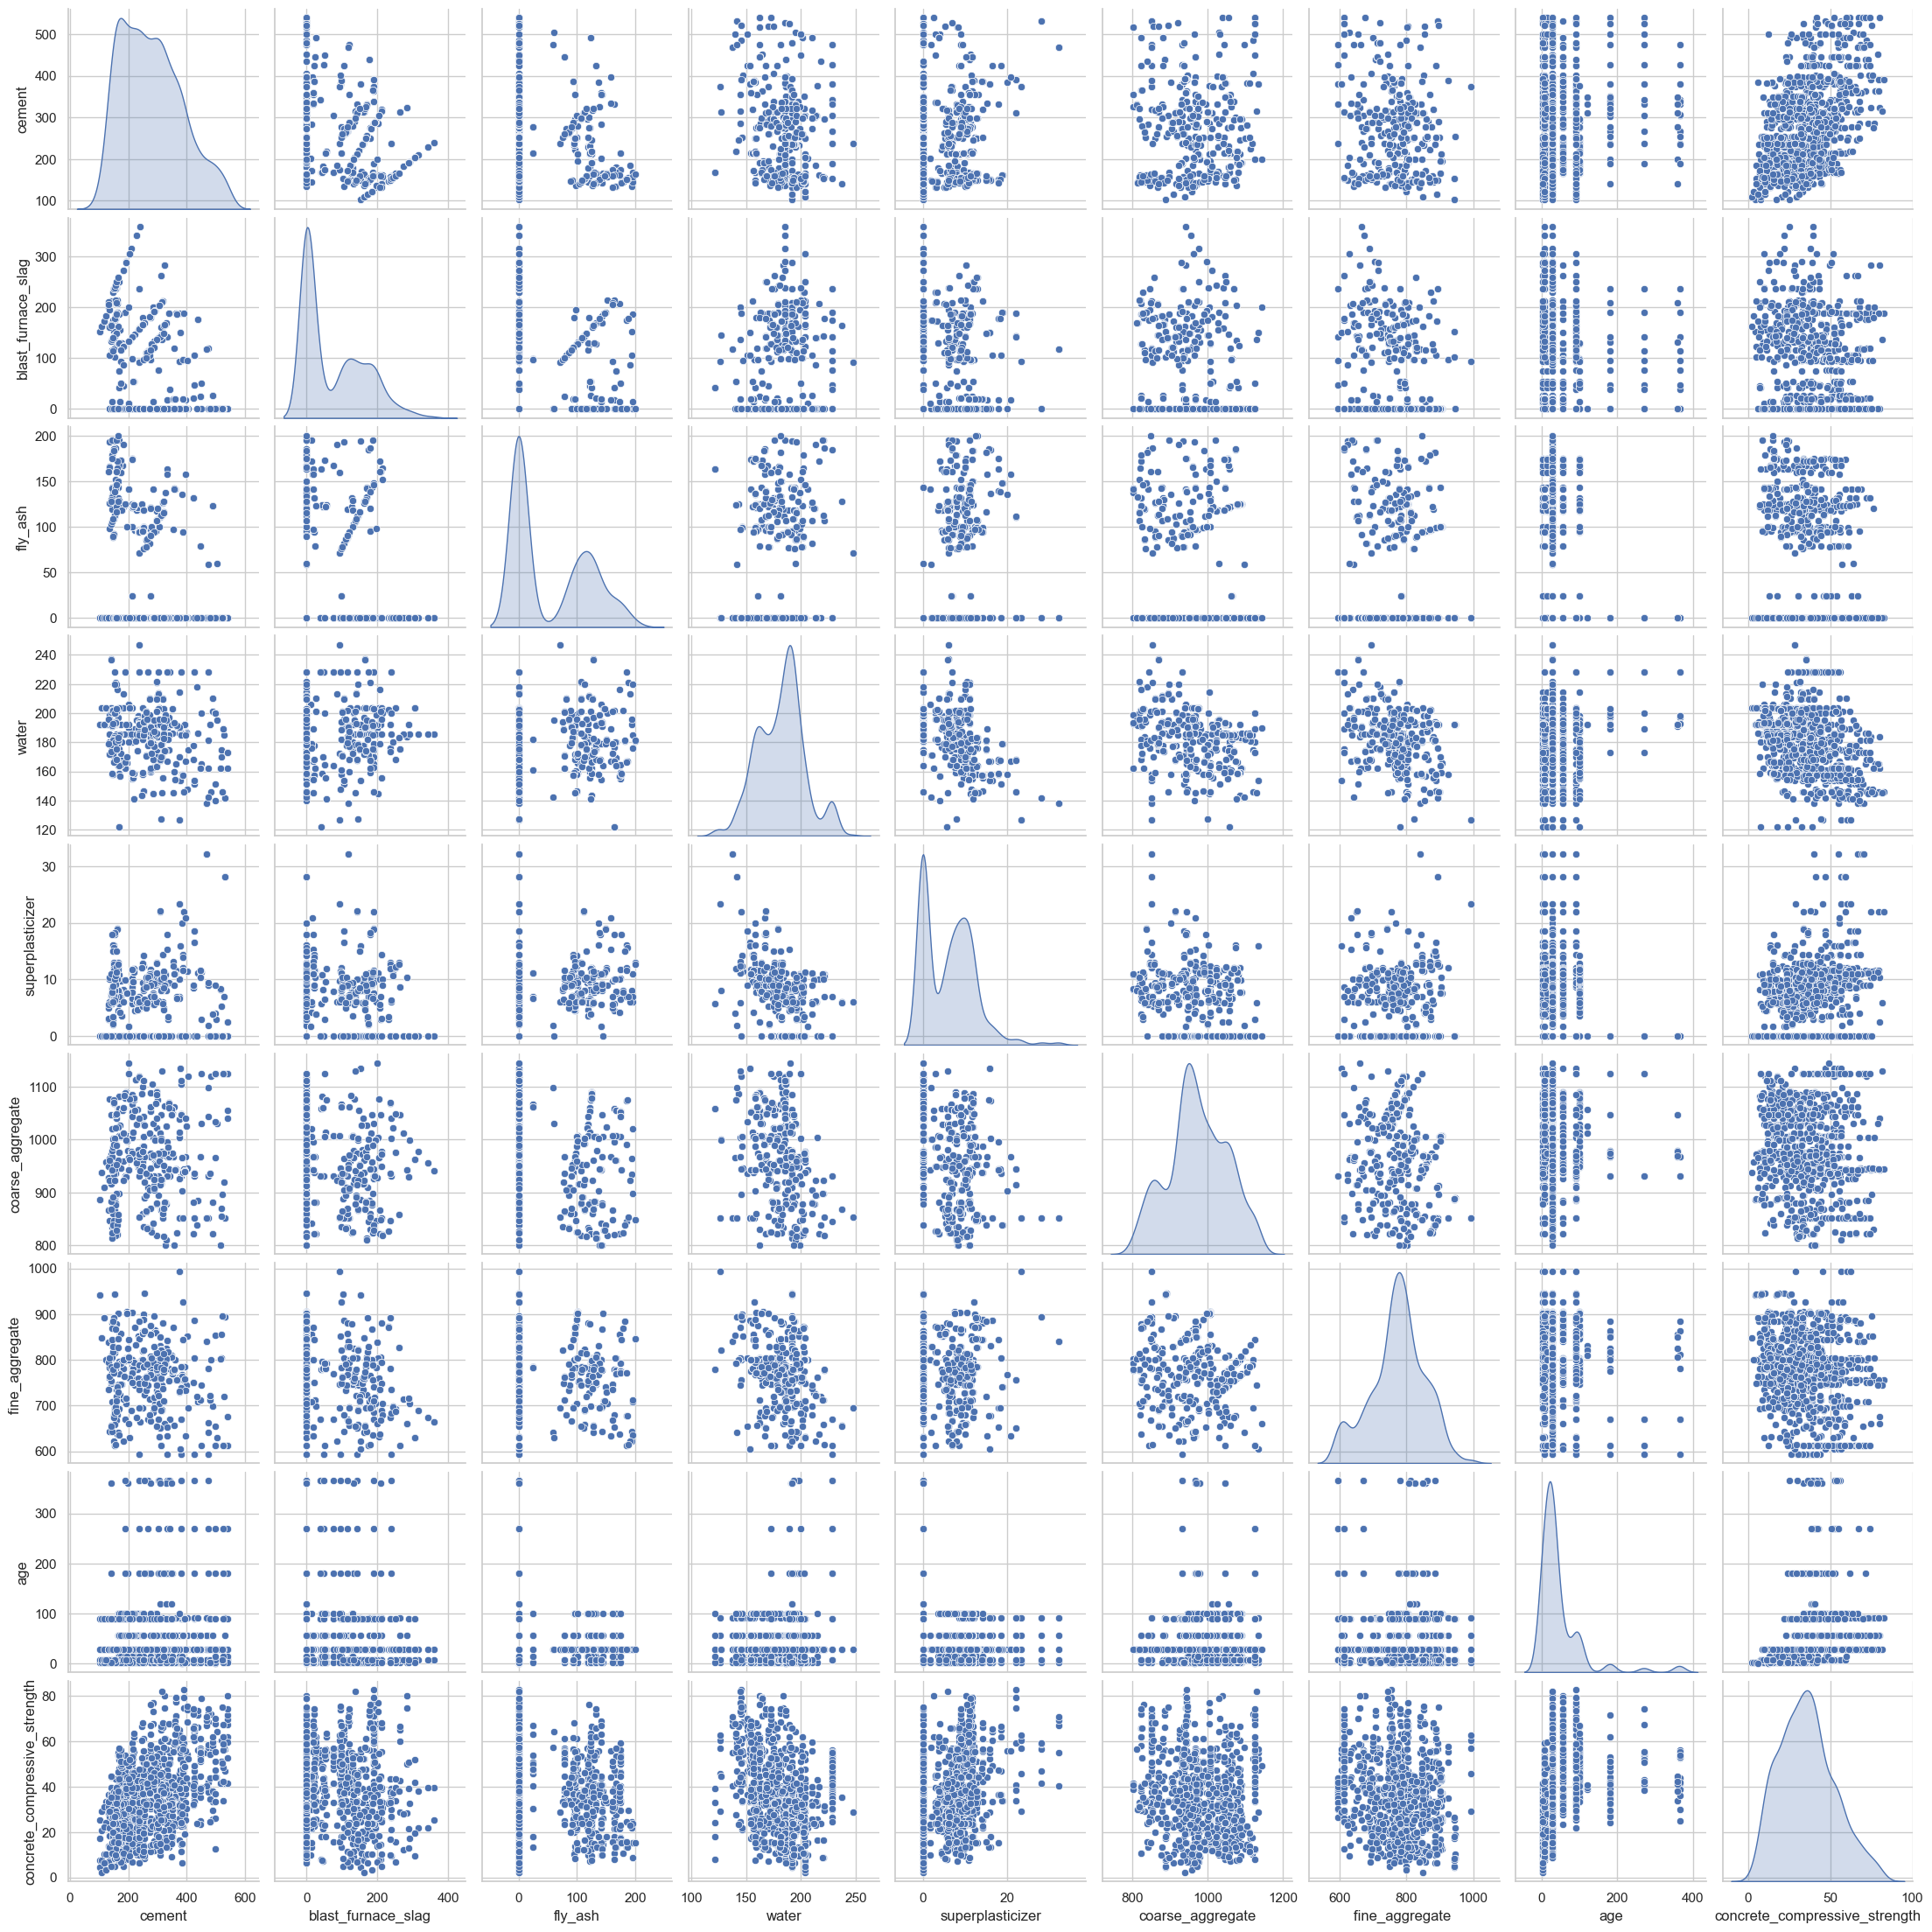

In [30]:
# Diagrams of each pair of variables:
sns.pairplot(df, diag_kind='kde')
plt.show()

<Axes: xlabel='water', ylabel='superplasticizer'>

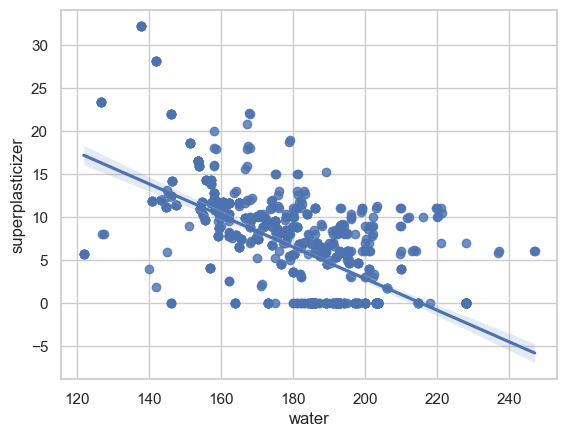

In [38]:
sns.regplot(x='water', y='superplasticizer', data=df)

# After Cleaning

We will repeat previous steps for the cleaned data which does not contain outliers.

In [39]:
# Correlation Matrix for Data without Outliers
set_no_outliers.corr()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
cement,1.000000,-0.262949,-0.373968,-0.088639,0.032001,-0.099472,-0.239603,-0.036289,0.476763
blast_furnace_slag,-0.262949,1.000000,-0.351422,0.113790,0.043895,-0.290074,-0.295298,-0.036781,0.141416
fly_ash,-0.373968,-0.351422,1.000000,-0.250416,0.453972,-0.038463,0.064153,0.054812,-0.054794
water,-0.088639,0.113790,-0.250416,1.000000,-0.641187,-0.208393,-0.364145,-0.022208,-0.369219
superplasticizer,0.032001,0.043895,0.453972,-0.641187,1.000000,-0.224616,0.114265,0.045529,0.402702
coarse_aggregate,-0.099472,-0.290074,-0.038463,-0.208393,-0.224616,1.000000,-0.179809,0.021818,-0.168207
fine_aggregate,-0.239603,-0.295298,0.064153,-0.364145,0.114265,-0.179809,1.000000,0.045744,-0.156866
age,-0.036289,-0.036781,0.054812,-0.022208,0.045529,0.021818,0.045744,1.000000,0.517506
concrete_compressive_strength,0.476763,0.141416,-0.054794,-0.369219,0.402702,-0.168207,-0.156866,0.517506,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

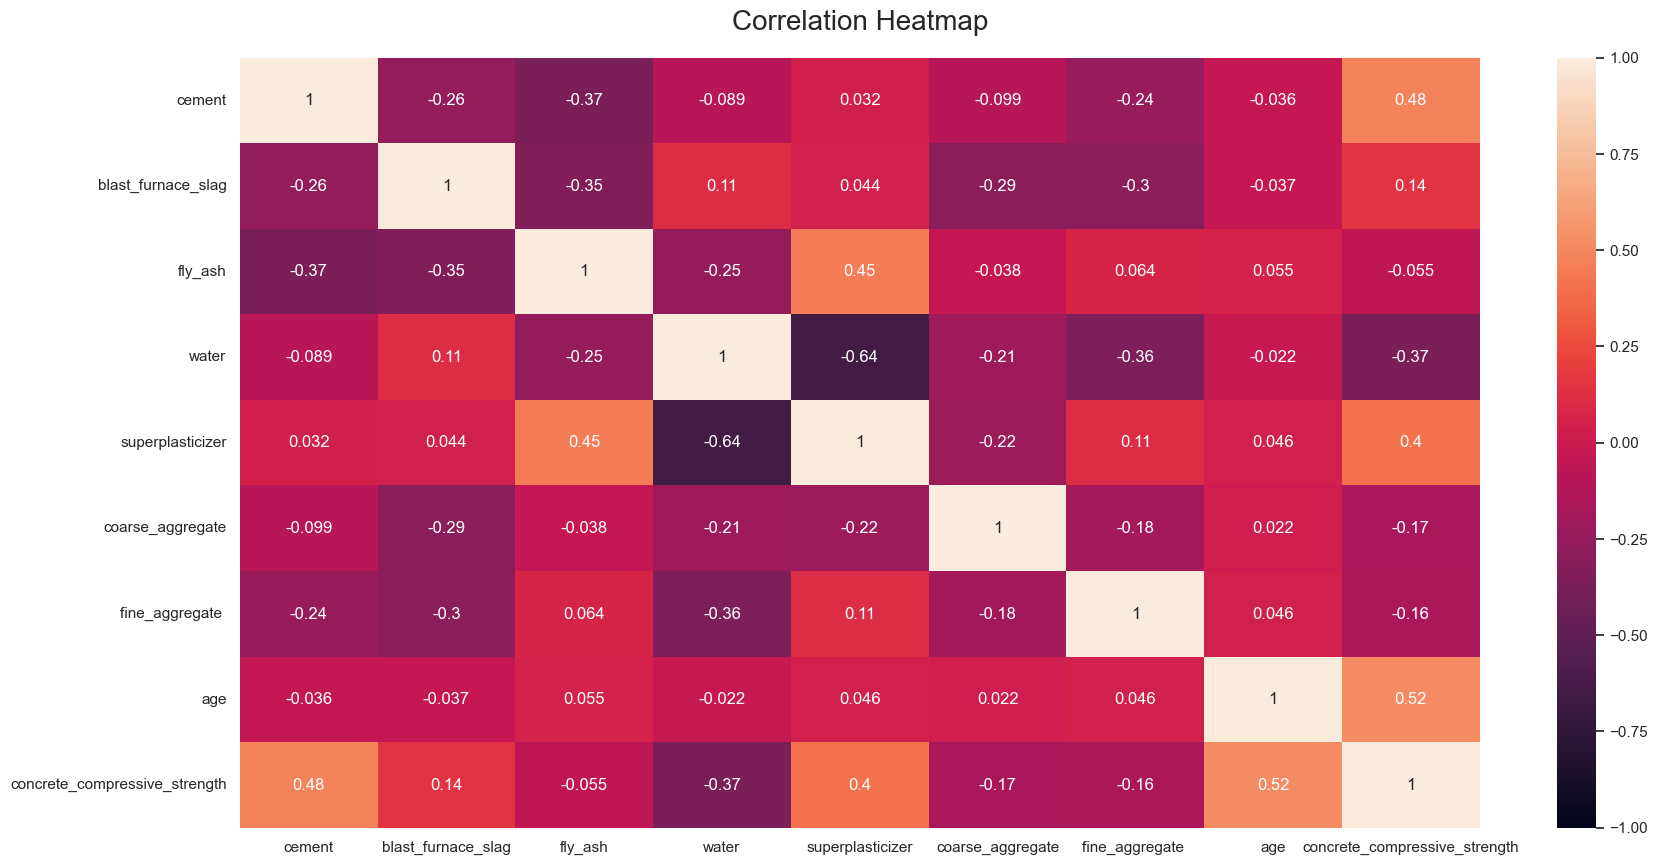

In [40]:
# Correlation Heatmap 
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(set_no_outliers.corr(),vmin=-1, vmax=1, annot=True)
heatmap.set_title("Correlation Heatmap",fontdict={'fontsize':20}, pad=20)

In [41]:
plt.figure(figsize=(30,30))

<Figure size 3000x3000 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

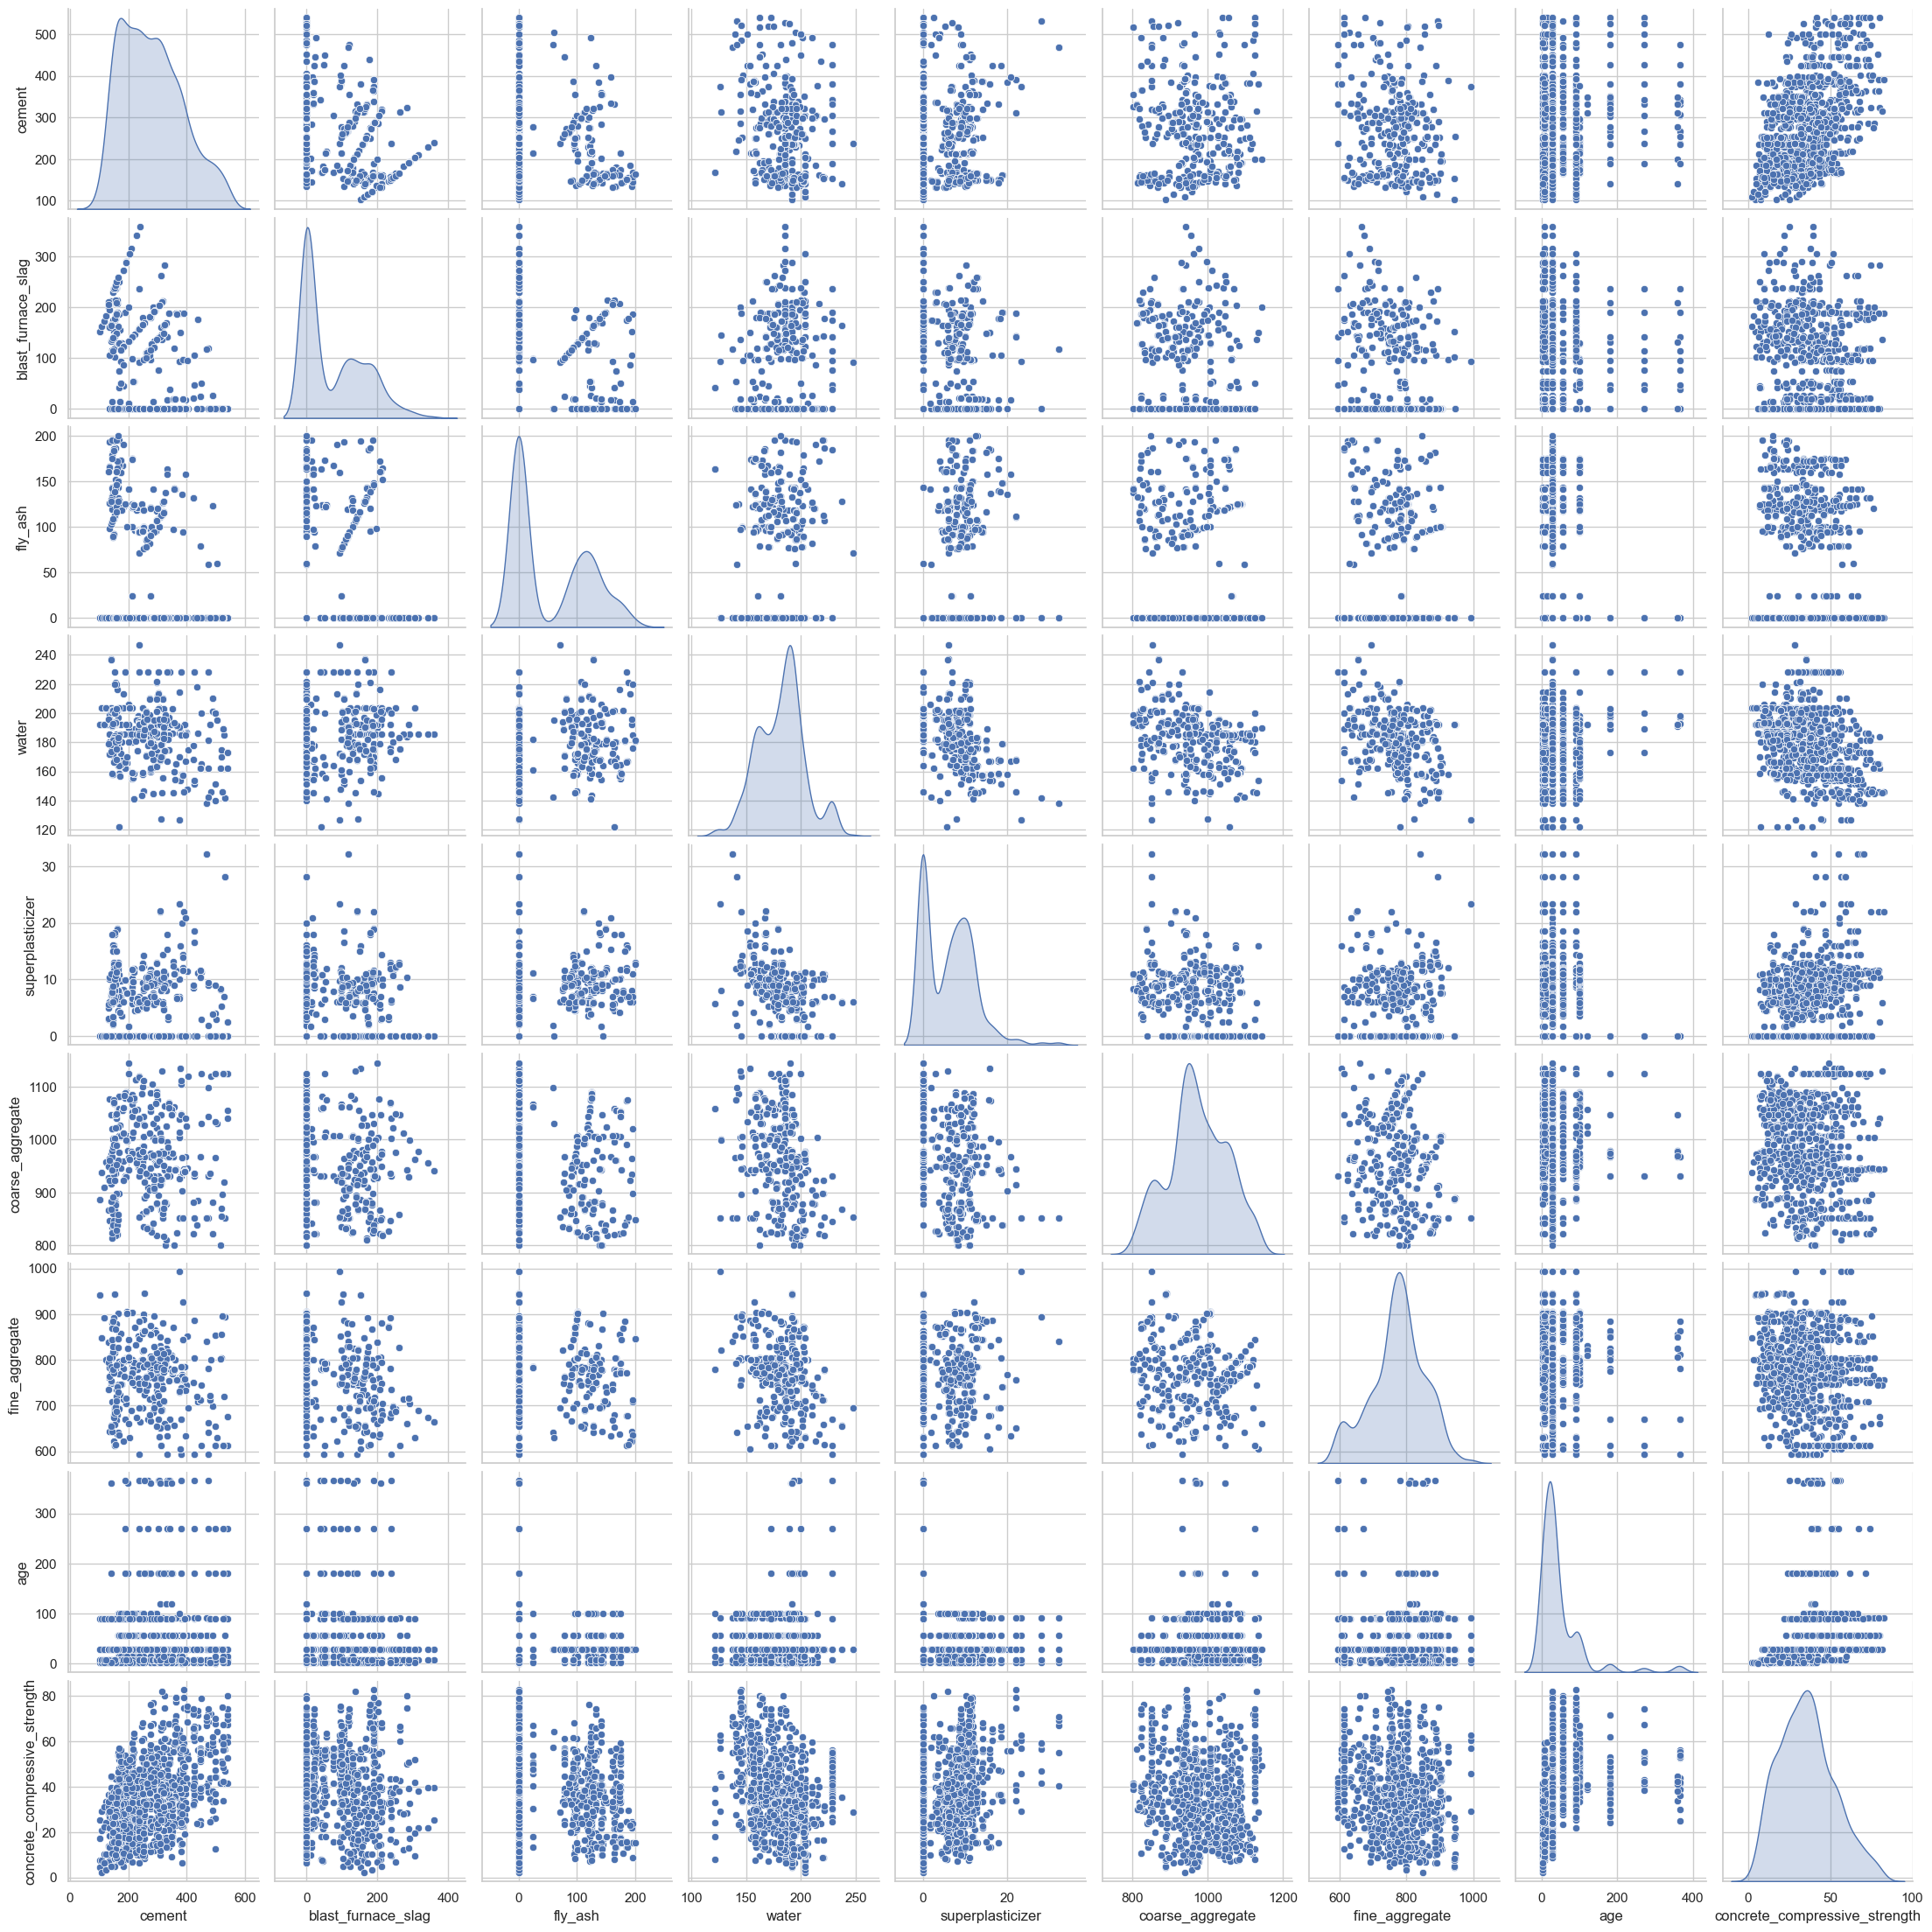

In [42]:
# Diagrams of each pair of variables:
sns.pairplot(df, diag_kind='kde')
plt.show()

# 2.2  - Data Preprocessing Continued

# Handling Missing Values

In [43]:
# Checking if there are any remaining missing values:
set_no_outliers.isna().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [44]:
set_no_outliers.size

8469

In [45]:
df.size

9270

In [47]:
# Importing necessary library for the mission values using missionno:
import missingno as msno

We will look at a **missing values matrix**. The white stripes indicate where the missing values in which variables are per row. 

<Axes: >

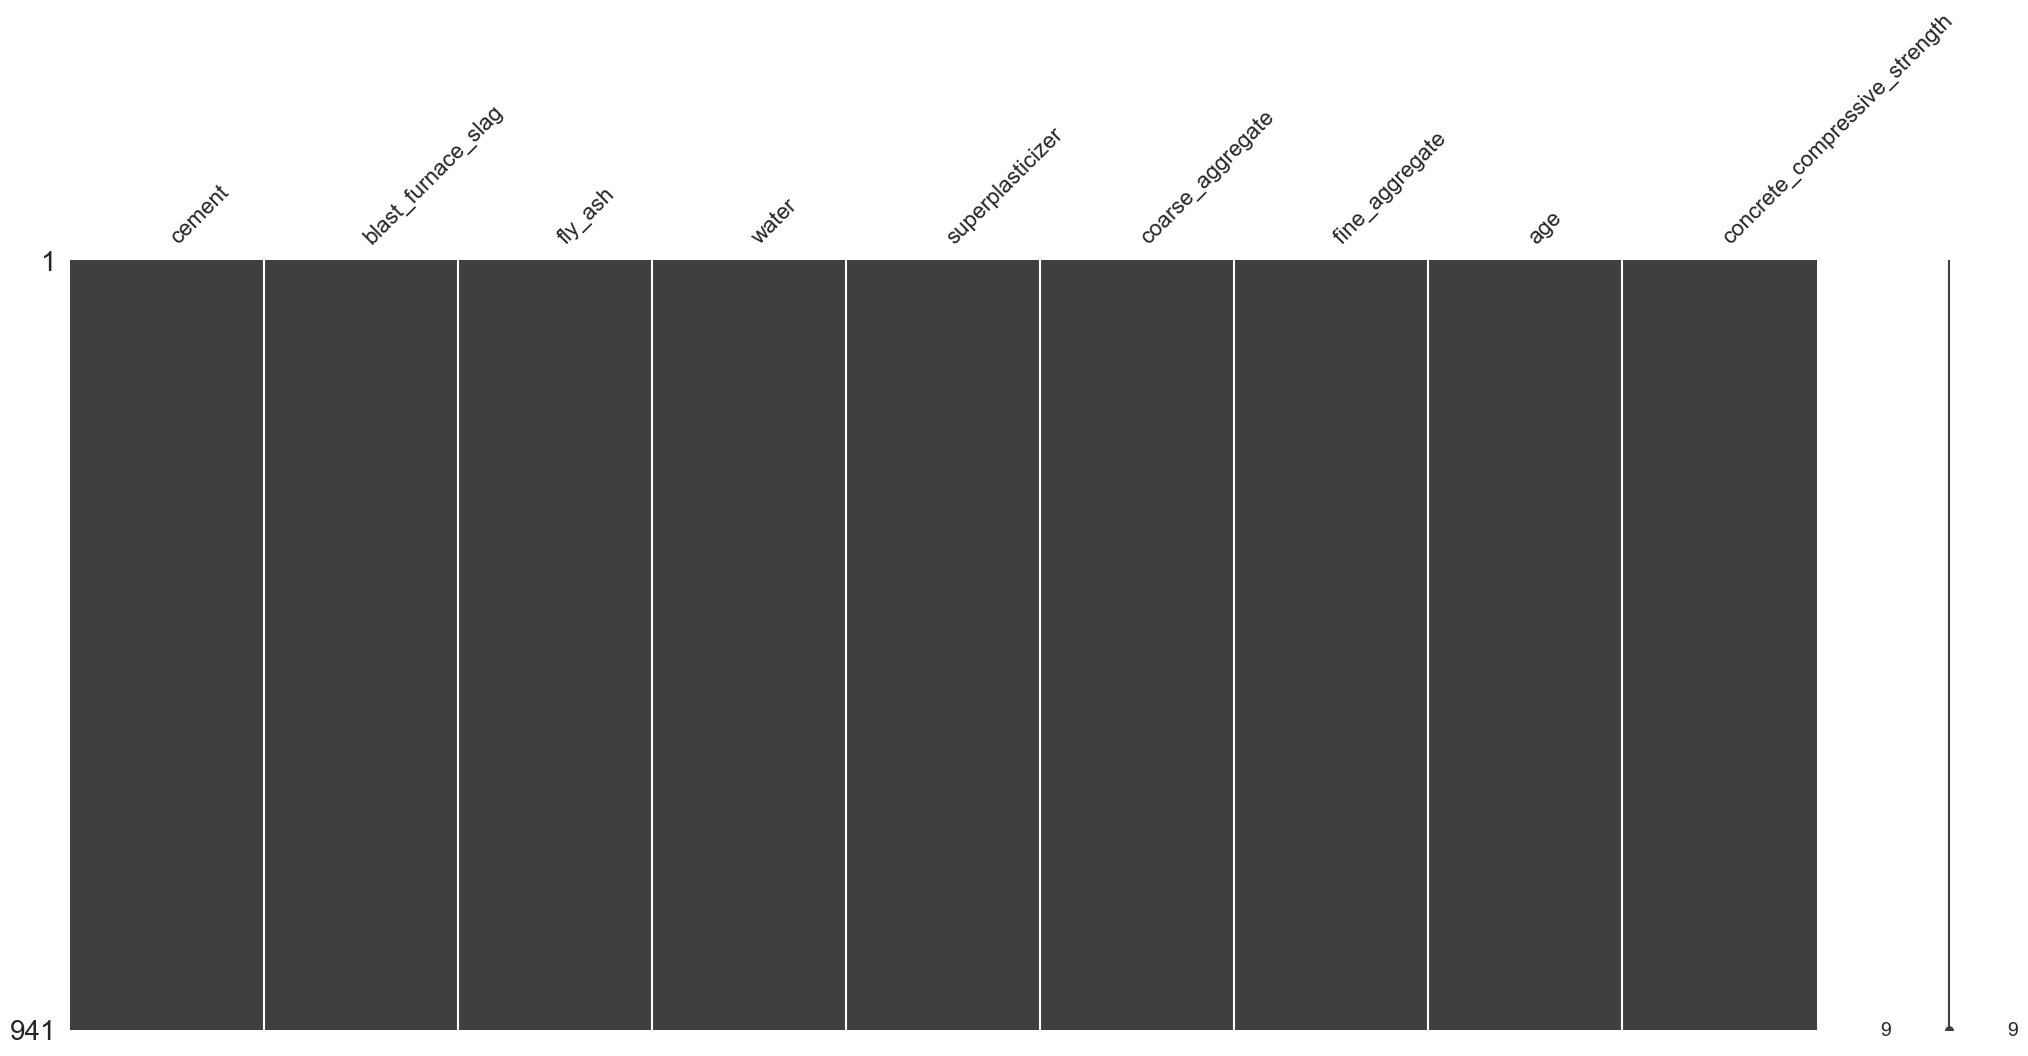

In [48]:
# Using bargraph to plot missing values:
msno.matrix(set_no_outliers)

<Axes: >

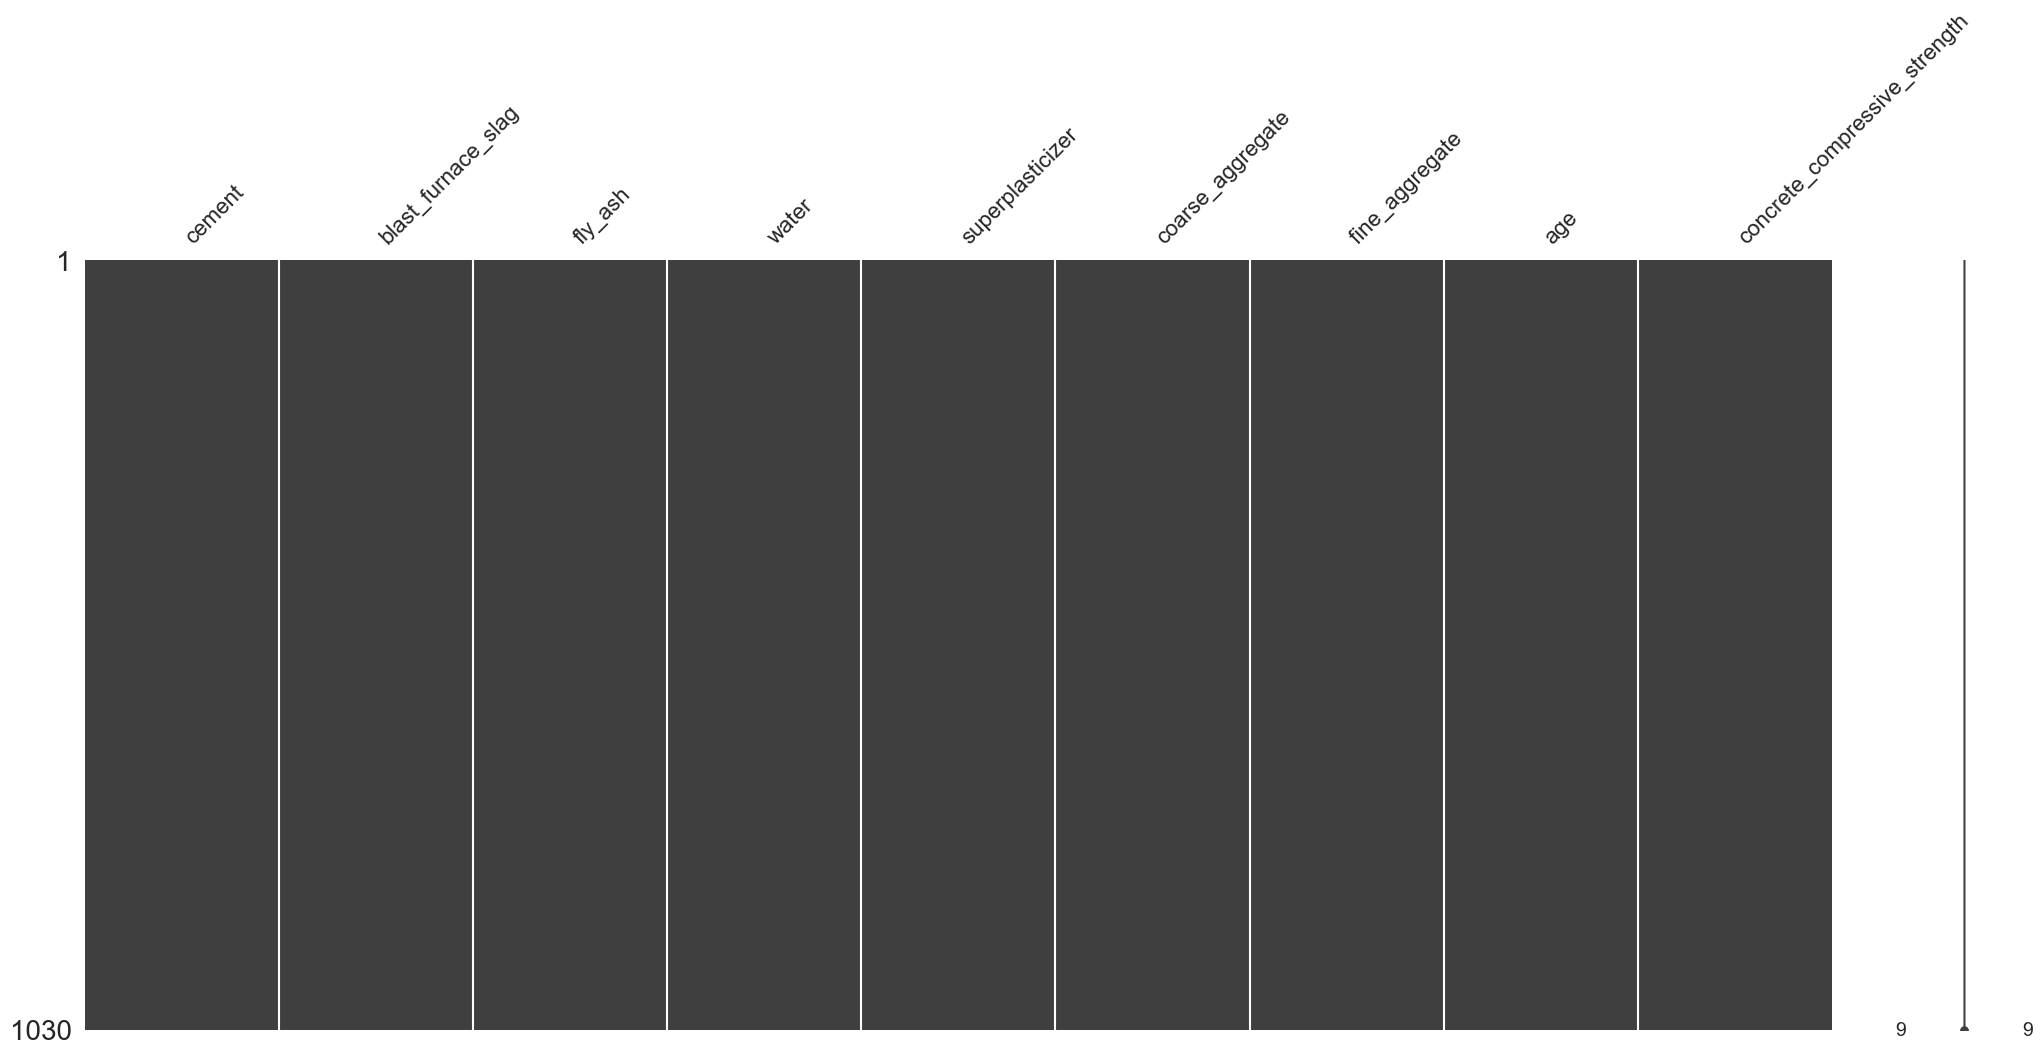

In [50]:
msno.matrix(df)

In [51]:
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [52]:
set_no_outliers.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

# Encoding Categorical Data

We do not have any categorical data for the "Concrete Strength" dataset. We will tell Python to check if we do to make sure we do not need to encode any categorical data.  
  
To do this we will use "hasattr()" function from Pandas library. If this returns "False" the data is numeric. If this returns "True" the data is categorical. 

In [55]:
hasattr(set_no_outliers["cement"], "cat")

False

However, we want this to be more efficient instead of typing the same function over and over again. To combat this we will simply use the .dtypes function from Pandas to get the data type of each column.

In [56]:
set_no_outliers.dtypes

cement                           float64
blast_furnace_slag               float64
fly_ash                          float64
water                            float64
superplasticizer                 float64
coarse_aggregate                 float64
fine_aggregate                   float64
age                                int64
concrete_compressive_strength    float64
dtype: object

The purpose of encoding categorical values is to allow for proper data analysis further on. By doing this we enable the future data models to give and improve further predictions. 

# Machine Learning Models

# XGBoost Model

In [59]:
# Extracting feeatures and target arrays:
X, y = df.drop('concrete_compressive_strength', axis=1), df[['concrete_compressive_strength']] #We drop strength because it is the output variable.

In [60]:
# Checking types and proper dropping of target set "Strength":
X.dtypes

cement                float64
blast_furnace_slag    float64
fly_ash               float64
water                 float64
superplasticizer      float64
coarse_aggregate      float64
fine_aggregate        float64
age                     int64
dtype: object

In [63]:
# Splitting the data into train and test sets with 0.25 test sizes:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=2)

In [64]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(772, 8) (772, 1) (258, 8) (258, 1)


In [65]:
target = "Concrete_Compressive_Strength"

In [66]:
def model(algorithm, dtrainx, dtrainy, dtestx, dtesty, of_type, plot=False):
    print (algorithm)
    print("*")
    algorithm.fit(dtrainx,dtrainy)
    
    prediction = algorithm.predict(dtestx)
    
    print("RMSE : ", np.sqrt(mean_squared_error(dtesty.prediction)))
    print("*")
    
    print('Performance on Training Data :')

In [87]:
import xgboost as xgb

In [88]:
# Creating regression matrices:
dtrain_reg = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

We have now built the **DMatrices**, now we must choose values for objective parameter. This will tell XGBoost what kind of problem you are trying to solve and which metrics to use to solve the problem. 

**Training**

In [71]:
#Hyperparameters:
params = {"objective": "reg:squarederror", "tree_method": "hist"} 

**Boosting**

In [72]:
# Model learns patters of the training set:
n = 100
model = xgb.train(
    params=params,
    dtrain=dtrain_reg,
    num_boost_round=n,
)

**Evaluation**

In [73]:
# We need to test our model on unseen data:
preds = model.predict(dtest_reg)

In [77]:
# Calculate RMSE
rmse = mse(y_test, preds, squared=False)
print(f"RMSE of the model: {rmse:.3f}")

RMSE of the model: 4.480


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


4.480 is the base score of the performance of a base model with a default parameter.

**Validation Sets**

In [78]:
params = {"objective": "reg:squarederror", "tree_method": "hist"}
n = 1000

# Create two tuples: 1 contains model for evaluation, 2 contains array's name:
evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

# Now we can check the performace after each boosting round when passing evals through the model and improving performance:
model = xgb.train(
    params=params,
    dtrain=dtrain_reg,
    num_boost_round=n,
    evals=evals,
    verbose_eval=100 # Print performance updates every 10 rounds.
)

[0]	train-rmse:12.74612	validation-rmse:12.55158
[100]	train-rmse:1.18041	validation-rmse:4.47930
[200]	train-rmse:1.10367	validation-rmse:4.46702
[300]	train-rmse:1.09690	validation-rmse:4.47059
[400]	train-rmse:1.09622	validation-rmse:4.46999
[500]	train-rmse:1.09618	validation-rmse:4.47013
[600]	train-rmse:1.09618	validation-rmse:4.47013
[700]	train-rmse:1.09618	validation-rmse:4.47013
[800]	train-rmse:1.09618	validation-rmse:4.47013
[900]	train-rmse:1.09618	validation-rmse:4.47013
[999]	train-rmse:1.09618	validation-rmse:4.47013


Note that after a certain amount of rounds of boosting the RMSE score continues to increase again. XGBoost model will tend to overfit and begin to memorize the dataset by adding an unnecessary amount of n boosting rounds. We can combat this by technique:

**Early Stopping**

This makes XGBoost pay attention to the RMSE values. When after a certain amount of rounds the values begin to increase the model will know to stop training the set.

In [79]:
n = 10000

model = xgb.train(
    params=params,
    dtrain=dtrain_reg,
    num_boost_round=n,
    evals=evals,
    verbose_eval=50, #Show performace every 50 rounds.
    early_stopping_rounds=50
)

[0]	train-rmse:12.74612	validation-rmse:12.55158
[50]	train-rmse:1.41501	validation-rmse:4.55208
[100]	train-rmse:1.18041	validation-rmse:4.47930
[150]	train-rmse:1.11970	validation-rmse:4.47755
[200]	train-rmse:1.10367	validation-rmse:4.46702
[250]	train-rmse:1.09834	validation-rmse:4.47146
[274]	train-rmse:1.09762	validation-rmse:4.46939


In [80]:
from numpy import loadtxt
from xgboost import XGBClassifier as xgb
from xgboost import plot_tree

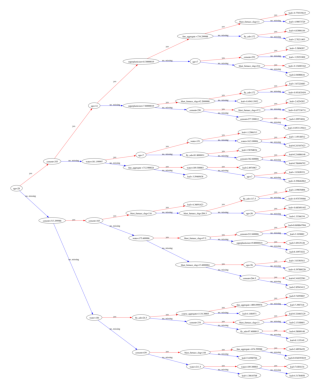

In [82]:
plot_tree(model, num_trees=0, rankdir='LR')
plt.show()

The XGBoost Model does not show us the greatest results as it is difficult to read.

**XGBoost Cross Validation**

To make sure the model will be valid in civil engineering processes we will cross validate it by splitting the training into "k" folds. Then, we will train the model k tomes. 

In [89]:
params = {"objective": "reg:squarederror", "tree_method": "hist"}
n = 1000

results = xgb.cv(
    params, 
    dtrain_reg,
    num_boost_round=n,
    nfold=5,  # k-fold cross-validation
    early_stopping_rounds=20
)

In [90]:
results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,12.754489,0.176234,13.303250,0.532734
1,9.822763,0.160763,10.787989,0.307837
2,7.753209,0.099124,9.014785,0.256000
3,6.228135,0.060950,7.908111,0.198371
4,5.145652,0.046420,7.121620,0.153736


Each row is average of folds per round. Since the lower the RMSE value the better, we will find the minimum value of "train-rmse-mean". 

In [91]:
best_rmse = results['test-rmse-mean'].min()

best_rmse

5.286153686451952

# Function for Training Models

In [92]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [93]:
# MODEL:
def train_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R2 Score: ",r2_score(y_test, y_pred))
    print("MSE: ",mean_squared_error(y_test, y_pred))
    print("RMSE: ",mean_squared_error(y_test, y_pred)**0.5)
    sns.regplot(y_test, y_pred)

# XGBoost

In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict with the trained model
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print the results
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Squared Error (MSE): {mse:.3f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
    print(f"Mean Absolute Error (MAE): {mae:.3f}")
    print(f"R² Score: {r2:.3f}")
    
    # Optionally, return the results as a dictionary
    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    }

# Example usage
from xgboost import XGBRegressor
train_model(XGBRegressor(), X_train, X_test, y_train, y_test)


Model: XGBRegressor
Mean Squared Error (MSE): 32.977
Root Mean Squared Error (RMSE): 5.743
Mean Absolute Error (MAE): 4.077
R² Score: 0.873


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


{'MSE': 32.97742809956963,
 'RMSE': 5.742597678713844,
 'MAE': 4.076863576719003,
 'R²': 0.8725616335868835}

# SVM Model

In [100]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict with the trained model
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print the results
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Squared Error (MSE): {mse:.3f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
    print(f"Mean Absolute Error (MAE): {mae:.3f}")
    print(f"R² Score: {r2:.3f}")
    
    # Optionally, return the results as a dictionary
    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    }

# Example usage with SVM
train_model(SVR(), X_train, X_test, y_train, y_test)


Model: SVR
Mean Squared Error (MSE): 81.503
Root Mean Squared Error (RMSE): 9.028
Mean Absolute Error (MAE): 7.347
R² Score: 0.685


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


{'MSE': 81.50301505678247,
 'RMSE': 9.027902029640247,
 'MAE': 7.347176388804537,
 'R²': 0.6850387413044903}

# Random Forest

In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict with the trained model
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print the results
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Squared Error (MSE): {mse:.3f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
    print(f"Mean Absolute Error (MAE): {mae:.3f}")
    print(f"R² Score: {r2:.3f}")
    
    # Optionally, return the results as a dictionary
    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    }

# Example usage with Random Forest Regressor
train_model(RandomForestRegressor(), X_train, X_test, y_train, y_test)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model: RandomForestRegressor
Mean Squared Error (MSE): 31.219
Root Mean Squared Error (RMSE): 5.587
Mean Absolute Error (MAE): 3.912
R² Score: 0.879


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


{'MSE': 31.21913895846252,
 'RMSE': 5.58740896645865,
 'MAE': 3.911662322812844,
 'R²': 0.8793563735660952}